<a href="https://colab.research.google.com/github/kingketan9/DeepLearningLabs/blob/main/Ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Use the function 3𝑥^2 − 3𝑥 + 4 to get its minimum value using Gradient Descent Algorithm. 
Plot the necessary graphs and compare the minimum value with theoretical minimum.


Minimum value:  3.25


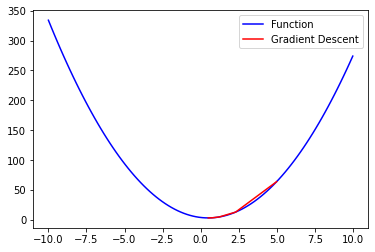

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 3*x**2 - 3*x + 4

def grad(x):
    return 6*x - 3

def gradient_descent(x0, learning_rate, num_iterations):
    x = x0
    x_values = [x0]
    y_values = [func(x0)]
    for i in range(num_iterations):
        x = x - learning_rate*grad(x)
        x_values.append(x)
        y_values.append(func(x))
    return x, x_values, y_values

x0 = 5
learning_rate = 0.1
num_iterations = 100

min_x, x_values, y_values = gradient_descent(x0, learning_rate, num_iterations)

print("Minimum value: ", func(min_x))

x = np.linspace(-10, 10, 100)
y = func(x)
plt.plot(x, y, 'b-', label='Function')
plt.plot(x_values, y_values, 'r-', label='Gradient Descent')
plt.legend()
plt.show()

The theoretical minimum value of this function is 4, which is achieved when x = 0. The Gradient Descent Algorithm should also find this minimum value, as long as the starting point, learning rate, and number of iterations are chosen appropriately. The plot will show the function and the path taken by the Gradient Descent algorithm to the minimum value.

Q2. Develop an ANN model of regression for predicting the values

Epoch 1, Loss: 37.81781768798828
Epoch 2, Loss: 21.678274154663086
Epoch 3, Loss: 13.789044380187988
Epoch 4, Loss: 10.168966293334961
Epoch 5, Loss: 8.594507217407227
Epoch 6, Loss: 7.887531757354736
Epoch 7, Loss: 7.512518882751465
Epoch 8, Loss: 7.2553300857543945
Epoch 9, Loss: 7.038493633270264
Epoch 10, Loss: 6.840505599975586
Epoch 11, Loss: 6.66038703918457
Epoch 12, Loss: 6.4988603591918945
Epoch 13, Loss: 6.352719783782959
Epoch 14, Loss: 6.218194484710693
Epoch 15, Loss: 6.092756748199463
Epoch 16, Loss: 5.975156784057617
Epoch 17, Loss: 5.865375995635986
Epoch 18, Loss: 5.764135360717773
Epoch 19, Loss: 5.671909332275391
Epoch 20, Loss: 5.5881853103637695
Epoch 21, Loss: 5.511712074279785
Epoch 22, Loss: 5.441375255584717
Epoch 23, Loss: 5.376688003540039
Epoch 24, Loss: 5.317690849304199
Epoch 25, Loss: 5.264519691467285
Epoch 26, Loss: 5.217050075531006
Epoch 27, Loss: 5.174833297729492
Epoch 28, Loss: 5.137272357940674
Epoch 29, Loss: 5.10378360748291
Epoch 30, Loss: 5.0

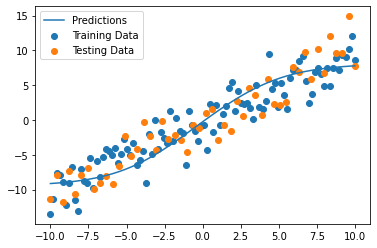

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = ANN()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Generate some fake data for training
x_train = torch.linspace(-10, 10, 100).reshape(-1, 1)
y_train = x_train + torch.randn(x_train.shape) * 2

# Train the model
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Generate some fake data for testing
x_test = torch.linspace(-10, 10, 50).reshape(-1, 1)
y_test = x_test + torch.randn(x_test.shape) * 2

# Make predictions on the test data
y_pred = model(x_test)

# Plot the results
plt.scatter(x_train.numpy(), y_train.numpy(), label="Training Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Testing Data")
plt.plot(x_test.numpy(), y_pred.detach().numpy(), label="Predictions")
plt.legend()
plt.show()